In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
file_path = "C:/Users/dell7/Downloads/PRCP-1009-CellphonePrice (1)/Data/datasets_11167_15520_train.csv"
df = pd.read_csv(file_path)

In [3]:
df_info = df.info()
df_head = df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [34]:
df['price_range'].value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

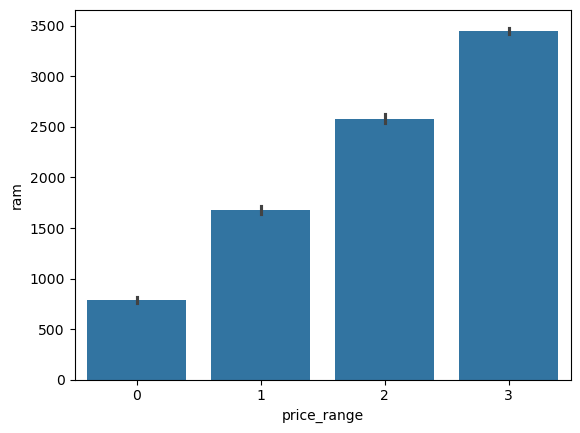

In [44]:
sns.barplot(data=df,y="ram",x="price_range")
plt.show()
correlation_matrix = df.corr()

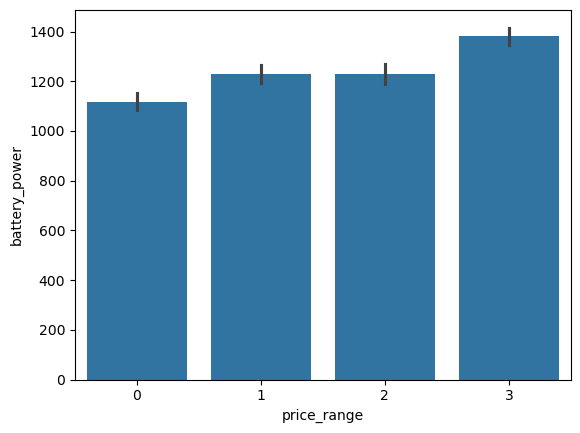

In [46]:
sns.barplot(data=df,y="battery_power",x="price_range")
plt.show()

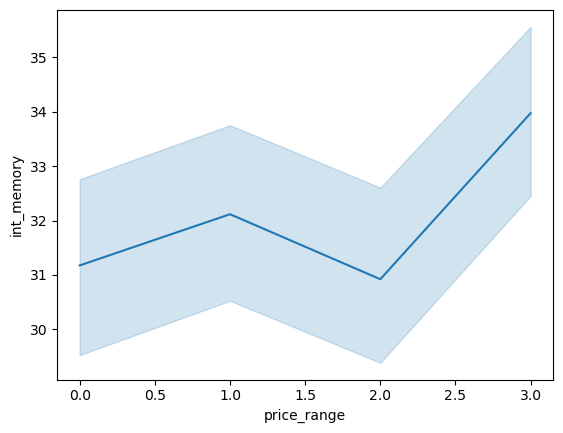

In [48]:
sns.lineplot(data=df,x="price_range",y="int_memory")
plt.show()

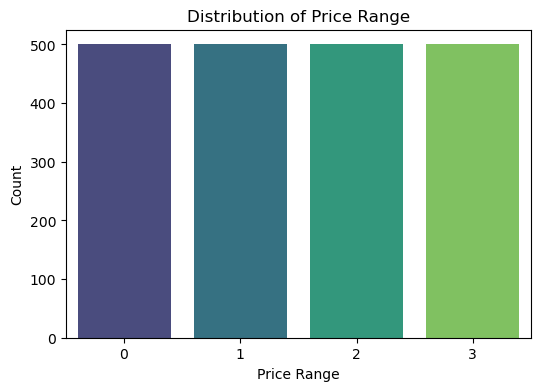

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(x='price_range', data=df, palette='viridis')
plt.title('Distribution of Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()

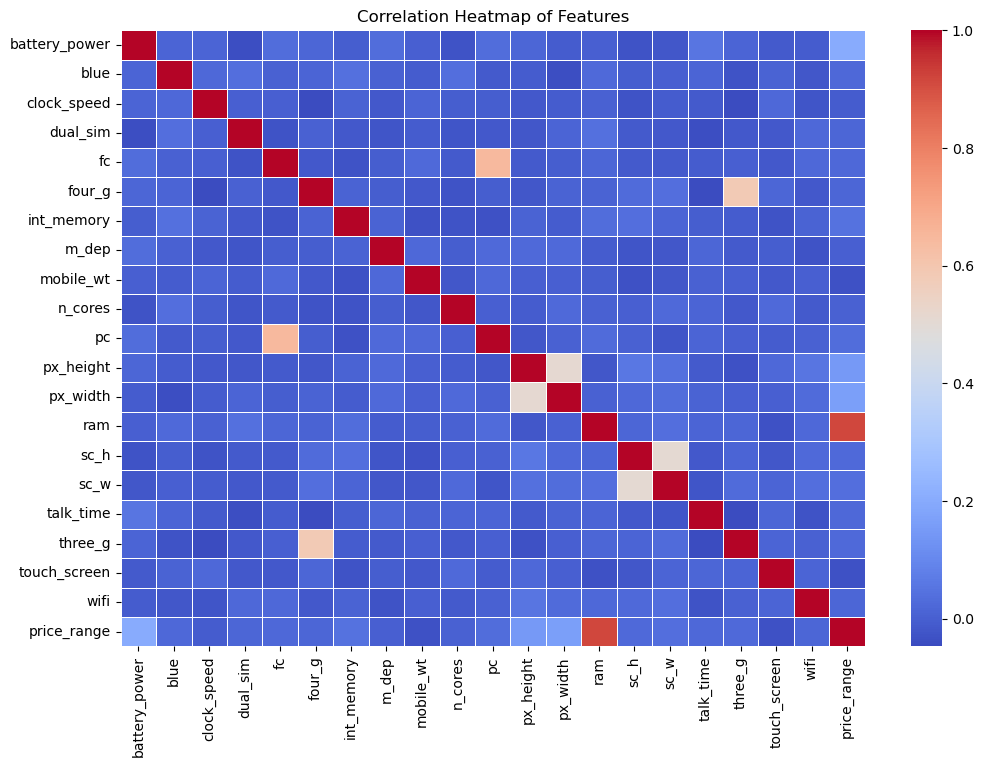

(                count        mean          std    min      25%     50%  \
 battery_power  2000.0  1238.51850   439.418206  501.0   851.75  1226.0   
 blue           2000.0     0.49500     0.500100    0.0     0.00     0.0   
 clock_speed    2000.0     1.52225     0.816004    0.5     0.70     1.5   
 dual_sim       2000.0     0.50950     0.500035    0.0     0.00     1.0   
 fc             2000.0     4.30950     4.341444    0.0     1.00     3.0   
 four_g         2000.0     0.52150     0.499662    0.0     0.00     1.0   
 int_memory     2000.0    32.04650    18.145715    2.0    16.00    32.0   
 m_dep          2000.0     0.50175     0.288416    0.1     0.20     0.5   
 mobile_wt      2000.0   140.24900    35.399655   80.0   109.00   141.0   
 n_cores        2000.0     4.52050     2.287837    1.0     3.00     4.0   
 pc             2000.0     9.91650     6.064315    0.0     5.00    10.0   
 px_height      2000.0   645.10800   443.780811    0.0   282.75   564.0   
 px_width       2000.0  1

In [8]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

df_summary, price_range_dist

In [9]:
X = df.drop(columns=['price_range'])
y = df['price_range']


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [11]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
y_pred = rf_model.predict(X_test)


In [13]:
accuracy = accuracy_score(y_test, y_pred)
classification_report_text = classification_report(y_test, y_pred)

accuracy, classification_report_text

(0.88,
 '              precision    recall  f1-score   support\n\n           0       0.95      0.96      0.96       100\n           1       0.82      0.84      0.83       100\n           2       0.81      0.79      0.80       100\n           3       0.93      0.93      0.93       100\n\n    accuracy                           0.88       400\n   macro avg       0.88      0.88      0.88       400\nweighted avg       0.88      0.88      0.88       400\n')

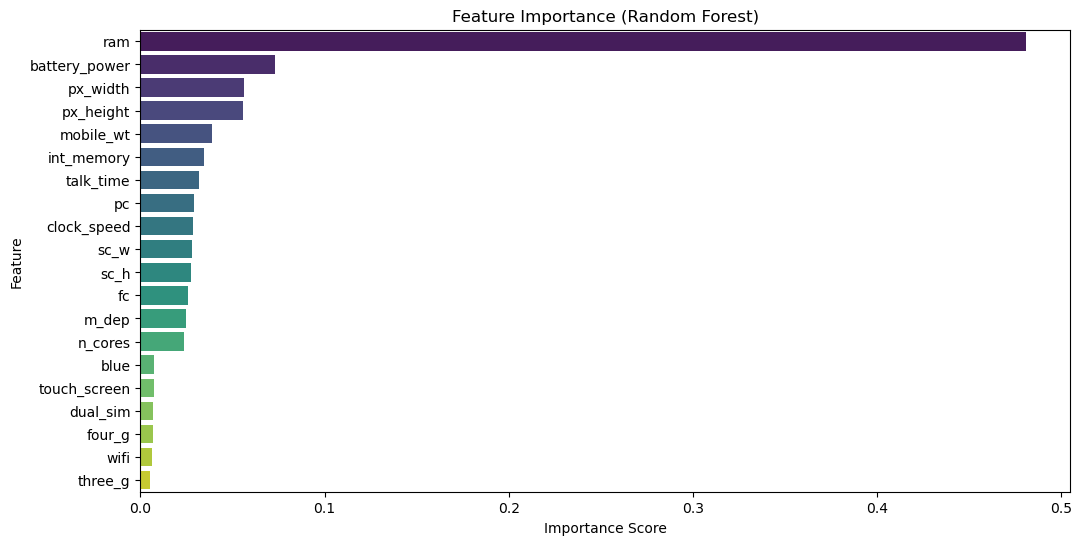

,Feature,Importance
13,ram,0.480768
0,battery_power,0.072976
12,px_width,0.056089
11,px_height,0.056000
8,mobile_wt,0.039007
6,int_memory,0.034837
16,talk_time,0.031891
10,pc,0.029158
2,clock_speed,0.028857
15,sc_w,0.027847


In [14]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

feature_importance